In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import pandas as pd
import cv2 as cv
import os

In [2]:
#LABEL = './exp3/labels/' # train
LABEL = './exp6/labels/' # dev

In [5]:
df_train = pd.read_csv('./train.csv', header=None)
df_dev = pd.read_csv('./dev.csv', header=None)
#df_train.head()
df_dev.head()

/home/mango/py_36_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,26519.jpg,559,772,233,413,不良-機械傷害,848.0,539.0,102.0,231.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,39995.jpg,376,481,103,88,不良-機械傷害,615.0,612.0,46.0,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40837.jpg,854,248,132,238,不良-機械傷害,743.0,587.0,32.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,09242.jpg,504,472,60,55,不良-炭疽病,646.0,382.0,318.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22304.jpg,723,693,399,108,不良-機械傷害,779.0,598.0,27.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Index
labels = ['不良-乳汁吸附', '不良-機械傷害', '不良-炭疽病', '不良-著色不佳', '不良-黑斑病']
label_index = [0, 1, 2, 3, 4]

In [7]:
df_train = df_train.replace(labels, label_index)
df_dev = df_dev.replace(labels, label_index)
#df_train.head()
df_dev.head()

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,26519.jpg,559,772,233,413,1,848.0,539.0,102.0,231.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,39995.jpg,376,481,103,88,1,615.0,612.0,46.0,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40837.jpg,854,248,132,238,1,743.0,587.0,32.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,09242.jpg,504,472,60,55,2,646.0,382.0,318.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22304.jpg,723,693,399,108,1,779.0,598.0,27.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
def mk_txt(df, path):
  if not os.path.exists('./labels/' + path):
    os.makedirs('./labels/' + path)
  if not os.path.exists('./images/' + path):
    os.makedirs('./images/' + path)
  for row in range(len(df)):
    image = cv.imread('../../../../YOLO_old/mango/' + path + 'images/' + df.loc[row, 0])
    # image = cv.imread('~/YOLO_old/mango/' + path + '/images/' + df.loc[row, 0])
    h_img, w_img, _ = image.shape
    try:
        with open(LABEL + os.path.splitext(df.loc[row, 0])[0] + '.txt', 'r') as l:
            label = l.readline()
            l_x, l_y, l_w, l_h = label.split()[1:5]
            l_x = int((float(l_x) - float(l_w) / 2) * w_img) 
            l_y = int((float(l_y) - float(l_h) / 2) * h_img)
            l_w = int(float(l_w) * w_img)
            l_h = int(float(l_h) * h_img)
            
            if l_x < 0:
                l_x = 0
                l_w = l_w + l_x
            if l_y < 0:
                l_y = 0
                l_h = l_h + l_y
            if l_x + l_w > w_img:
                l_w = w_img - l_x
            if l_y + l_h > h_img:
                l_h = h_img - l_y
                
            crop = image[l_y: l_y+l_h, l_x: l_x+l_w]
            cv.imwrite('./images/' + path + df.loc[row, 0], crop)
    except FileNotFoundError:
        print(LABEL + os.path.splitext(df.loc[row, 0])[0] + '.txt' + ' NotFound')
        
    with open('./labels/' + path + os.path.splitext(df.loc[row, 0])[0] + '.txt', 'w') as f:
        for col in range(5, len(df.columns), 5): 
            if pd.notna(df.loc[row, col]):
                x, y, w, h = df.loc[row, col - 4:col - 1].astype(float) # left top w h
                if x + w / 2 < l_x or x + w / 2 > l_x + l_w or y + h / 2 < l_y or y + h / 2 > l_y + l_h:
                    break
                
                if x < l_x:
                    x = l_x
                    w = w + x
                if y < l_y:
                    y = l_y
                    h = h + y
                if x + w > l_x + l_w:
                    w = l_x + l_w - x
                if y + h > l_y + l_h:
                    h = l_y + l_h - y
                
                # convert
                x = x - l_x
                y = y - l_y
                x = (x + w / 2) / l_w 
                y = (y + h / 2) / l_h
                w = w / l_w
                h = h / l_h
                
                
                
                print('%d %.6f %.6f %.6f %.6f' % 
                 (df.loc[row, col],
                 x,
                 y,
                 w,
                 h))
                print('%d %.6f %.6f %.6f %.6f' % 
                 (df.loc[row, col],
                 x,
                 y,
                 w,
                 h), file=f)

In [9]:
#mk_txt(df_train, 'train/')
mk_txt(df_dev, 'valid/')

1 0.632619 0.639487 0.262980 0.341887
2 0.884876 0.371275 0.115124 0.191225
2 0.612302 0.294288 0.095937 0.116722
1 0.279097 0.559871 0.081552 0.094930
2 0.445764 0.670982 0.036421 0.034520
2 0.393508 0.866235 0.045922 0.043150
2 0.512272 0.370550 0.047506 0.076591
1 0.765625 0.380299 0.128906 0.296758
2 0.608398 0.670823 0.031250 0.032419
2 0.629883 0.170200 0.052734 0.053616
2 0.338850 0.509744 0.052265 0.066991
1 0.574913 0.427527 0.277003 0.121803
0 0.764808 0.521315 0.078397 0.119367
0 0.503484 0.649208 0.315331 0.138855
1 0.654270 0.793939 0.366391 0.130909
2 0.534894 0.629091 0.024793 0.031515
2 0.789602 0.174569 0.063363 0.099138
1 0.776198 0.321121 0.052803 0.043103
2 0.863526 0.500539 0.055240 0.076509
2 0.611292 0.736530 0.314379 0.238147
4 0.512591 0.394397 0.175467 0.390086
4 0.444145 0.455036 0.276579 0.195444
4 0.747304 0.583333 0.366718 0.468825
4 0.459553 0.688249 0.214946 0.263789
1 0.233821 0.679257 0.142527 0.094724
1 0.391047 0.259240 0.253378 0.159451
1 0.388091 0

2 0.483965 0.413423 0.155491 0.204027
2 0.314869 0.306040 0.056365 0.083221
2 0.234208 0.456376 0.033042 0.069799
2 0.374150 0.557047 0.038873 0.061745
2 0.469388 0.808725 0.079689 0.111409
2 0.735666 0.734899 0.052478 0.068456
3 0.500000 0.500000 1.000000 1.000000
2 0.375723 0.602201 0.046243 0.075472
2 0.135260 0.652516 0.053179 0.053459
2 0.564162 0.702044 0.073988 0.117925
2 0.679769 0.703616 0.064740 0.058176
2 0.399422 0.882862 0.077457 0.067610
3 0.509249 0.503145 0.981503 0.864780
2 0.644597 0.533675 0.098517 0.127379
2 0.504237 0.453880 0.135593 0.090776
2 0.354873 0.459736 0.055085 0.070278
2 0.283898 0.545388 0.040254 0.045388
2 0.208157 0.564422 0.043432 0.045388
2 0.404661 0.650805 0.080508 0.080527
2 0.349047 0.587116 0.045551 0.058565
2 0.469809 0.713031 0.051907 0.052709
2 0.307203 0.829429 0.048729 0.039531
2 0.609640 0.771596 0.054025 0.114202
3 0.575742 0.606149 0.840042 0.752562
2 0.452888 0.616874 0.054711 0.069156
2 0.105370 0.637621 0.026342 0.130014
2 0.199088 0

3 0.653846 0.332036 0.692308 0.630701
2 0.040323 0.495294 0.033107 0.047059
2 0.061818 0.588341 0.058182 0.104567
2 0.505909 0.723558 0.055455 0.072115
2 0.348023 0.506111 0.081549 0.132222
2 0.288303 0.375000 0.054366 0.074444
2 0.263180 0.526667 0.058484 0.117778
2 0.440692 0.467778 0.049423 0.060000
2 0.064169 0.494700 0.057709 0.103651
3 0.395349 0.516490 0.323859 0.333333
4 0.827139 0.428140 0.029386 0.054348
2 0.484914 0.828620 0.030172 0.041855
2 0.638131 0.474725 0.141439 0.149451
2 0.347808 0.258242 0.071960 0.092308
2 0.167494 0.167582 0.068652 0.075824
2 0.457061 0.529483 0.051527 0.062575
2 0.399091 0.383592 0.087273 0.075388
2 0.165582 0.446136 0.048007 0.058548
2 0.571196 0.489461 0.071603 0.128806
2 0.340782 0.428494 0.197925 0.174431
2 0.280710 0.158416 0.068244 0.061881
3 0.473612 0.508045 0.797998 0.857673
2 0.202166 0.795943 0.046931 0.078759
2 0.315261 0.318339 0.248193 0.433679
2 0.434399 0.573563 0.241379 0.234483
2 0.443650 0.264368 0.100084 0.163218
2 0.289739 0

2 0.137097 0.395041 0.085608 0.122314
2 0.567618 0.595868 0.043424 0.067769
3 0.501732 0.499258 0.996536 0.992582
3 0.551495 0.429775 0.877076 0.848315
2 0.335183 0.566667 0.279689 0.327536
2 0.405000 0.771350 0.418000 0.347107
2 0.065500 0.331956 0.065000 0.137741
2 0.323500 0.352617 0.063000 0.057851
2 0.645304 0.619748 0.101657 0.135854
2 0.566298 0.098739 0.034254 0.032213
2 0.281768 0.178571 0.035359 0.043417
2 0.566210 0.683437 0.084475 0.227554
2 0.716216 0.830247 0.036428 0.043210
3 0.502179 0.490399 0.965142 0.966027
3 0.514636 0.496094 0.948064 0.958333
2 0.057159 0.490525 0.061043 0.053936
2 0.114872 0.361516 0.047725 0.064140
2 0.344903 0.901840 0.050088 0.090798
0 0.205185 0.341104 0.039543 0.061350
0 0.364236 0.649080 0.021968 0.036810
2 0.745167 0.178528 0.033392 0.038037
2 0.526152 0.839791 0.118306 0.132638
2 0.483724 0.831810 0.066406 0.073126
2 0.202247 0.240933 0.079900 0.088083
2 0.761240 0.389328 0.139535 0.158103
2 0.612403 0.670949 0.055814 0.081028
2 0.275136 0

4 0.536547 0.433108 0.054025 0.068919
0 0.285193 0.677527 0.570386 0.445479
2 0.486444 0.567819 0.067779 0.069149
2 0.284304 0.295822 0.335759 0.276280
2 0.538981 0.604447 0.040541 0.084906
2 0.562890 0.378706 0.042620 0.056604
2 0.464539 0.460212 0.082067 0.106101
2 0.275583 0.602785 0.054711 0.083554
2 0.641337 0.492706 0.091185 0.049072
2 0.416920 0.220159 0.051672 0.047745
0 0.463087 0.193910 0.067114 0.083333
0 0.155481 0.264423 0.073826 0.099359
0 0.270694 0.595353 0.272931 0.200321
0 0.322148 0.157853 0.170022 0.149038
2 0.543722 0.797317 0.056054 0.068554
0 0.189462 0.423249 0.056054 0.071535
4 0.650338 0.716535 0.052928 0.069291
4 0.837275 0.644882 0.043919 0.061417
4 0.773649 0.551181 0.042793 0.044094
0 0.664604 0.698675 0.225248 0.258278
0 0.656559 0.480960 0.112624 0.110927
4 0.299279 0.181600 0.050481 0.068800
4 0.589543 0.164000 0.058894 0.052800
4 0.671274 0.428000 0.037260 0.049600
2 0.468254 0.784749 0.052910 0.059846
0 0.574735 0.776062 0.170635 0.212355
0 0.829365 0

2 0.155032 0.235714 0.029012 0.050649
2 0.423844 0.228571 0.200363 0.109091
2 0.666364 0.089610 0.050771 0.038961
2 0.194016 0.844805 0.041704 0.061039
2 0.678965 0.722543 0.036472 0.076301
2 0.254029 0.777457 0.034775 0.042775
2 0.553502 0.445638 0.052529 0.061745
2 0.559825 0.538255 0.045720 0.059060
2 0.307080 0.851197 0.368142 0.169897
4 0.283186 0.640821 0.030088 0.034208
4 0.294690 0.603763 0.030088 0.035348
4 0.360177 0.672748 0.028319 0.038769
4 0.418142 0.720639 0.034513 0.050171
2 0.829646 0.724629 0.078761 0.087799
2 0.853540 0.612885 0.036283 0.058153
2 0.560619 0.441277 0.048673 0.063854
2 0.450474 0.525403 0.036176 0.052045
2 0.373385 0.864932 0.031869 0.042131
4 0.165805 0.568773 0.019811 0.037175
2 0.632917 0.807298 0.060461 0.088348
2 0.449136 0.441101 0.042226 0.055058
2 0.349808 0.293854 0.050864 0.055058
2 0.687140 0.362996 0.040307 0.052497
2 0.247601 0.270807 0.042226 0.078105
2 0.257678 0.715749 0.045106 0.046095
2 0.397313 0.934059 0.044146 0.042254
2 0.842753 0

2 0.863378 0.492241 0.151803 0.167241
2 0.771347 0.584483 0.055028 0.068966
2 0.648148 0.800420 0.111111 0.138655
3 0.762868 0.592233 0.386029 0.608414
3 0.399378 0.574176 0.363071 0.302198
3 0.658088 0.359649 0.531863 0.504386
3 0.511315 0.646535 0.971711 0.655446
3 0.491337 0.255193 0.769802 0.278932
3 0.320255 0.386878 0.421533 0.484163
2 0.405257 0.585244 0.130807 0.150430
3 0.479218 0.481375 0.838631 0.879656
3 0.427536 0.351536 0.611594 0.566553
3 0.494366 0.652015 0.678873 0.673993
3 0.318627 0.593117 0.500000 0.773279
3 0.508117 0.573260 0.581169 0.560440
3 0.757009 0.512821 0.485981 0.472934
2 0.514783 0.889234 0.073043 0.068323
2 0.594241 0.503861 0.214660 0.405405
3 0.643863 0.432266 0.563380 0.460591
3 0.507160 0.629283 0.269690 0.417445
3 0.715969 0.230861 0.442408 0.447368
2 0.310959 0.575000 0.052055 0.070000
2 0.379452 0.788333 0.101370 0.103333
2 0.807252 0.494129 0.251908 0.647750
2 0.097394 0.214396 0.153635 0.233746
2 0.757550 0.505792 0.045302 0.065637
2 0.595638 0

2 0.153084 0.475229 0.094714 0.077064
3 0.430481 0.483240 0.572193 0.748603
3 0.242647 0.151226 0.176471 0.100817
3 0.446078 0.784741 0.470588 0.365123
3 0.851716 0.570845 0.296569 0.438692
2 0.475475 0.692308 0.245253 0.207900
3 0.765625 0.580679 0.379464 0.639066
3 0.524209 0.205000 0.739292 0.325000
3 0.538194 0.458661 0.479167 0.562992
3 0.542922 0.739700 0.914157 0.501873
3 0.221311 0.533270 0.341282 0.393536
2 0.102446 0.359489 0.113150 0.083942
2 0.677794 0.216593 0.351234 0.277533
2 0.527027 0.831933 0.117117 0.106443
3 0.550314 0.321138 0.551363 0.426829
3 0.403727 0.476744 0.751553 0.922481
3 0.260417 0.450980 0.328125 0.424837
3 0.603618 0.592000 0.588816 0.552000
2 0.837573 0.716438 0.093933 0.139726
3 0.585526 0.618343 0.662281 0.508876
3 0.487179 0.515175 0.930769 0.948407
2 0.084577 0.644097 0.089552 0.079861
2 0.687811 0.527778 0.092040 0.104167
2 0.262850 0.498512 0.109813 0.157738
2 0.635514 0.224702 0.112150 0.133929
2 0.219626 0.776786 0.060748 0.059524
3 0.350379 0

2 0.814741 0.455537 0.079681 0.068792
3 0.548165 0.520492 0.903670 0.909836
3 0.649153 0.435403 0.701695 0.746644
3 0.421384 0.545455 0.318658 0.411765
3 0.211670 0.470100 0.304348 0.408638
3 0.449234 0.756313 0.362069 0.487374
3 0.543175 0.684982 0.768802 0.630037
3 0.780435 0.708333 0.426087 0.518817
3 0.612903 0.483957 0.726882 0.705882
3 0.294212 0.640625 0.530547 0.525568
2 0.594286 0.642504 0.118095 0.056013
3 0.650588 0.692225 0.543529 0.507559
3 0.302857 0.442149 0.400000 0.507438
2 0.316867 0.559944 0.265060 0.177715
3 0.375904 0.489422 0.713253 0.950635
3 0.470642 0.466587 0.600000 0.575179
3 0.402174 0.500000 0.375000 1.000000
3 0.815407 0.554924 0.206395 0.390152
2 0.356151 0.460993 0.180556 0.165485
2 0.702740 0.610320 0.145205 0.124555
3 0.713699 0.405694 0.479452 0.604982
3 0.683709 0.628676 0.542461 0.625000
0 0.284965 0.672727 0.541958 0.501818
3 0.500000 0.541339 1.000000 0.460630
3 0.254630 0.458042 0.453704 0.545455
3 0.566667 0.799528 0.683333 0.400943
3 0.390823 0

3 0.628431 0.557181 0.688235 0.859043
3 0.654034 0.337209 0.325183 0.637209
0 0.600154 0.327885 0.405239 0.613462
2 0.090634 0.582031 0.145015 0.125000
3 0.848214 0.643008 0.248016 0.459746
3 0.532039 0.466234 0.609709 0.568831
2 0.753512 0.747489 0.234994 0.278336
0 0.168359 0.484317 0.319797 0.559041
0 0.776650 0.248155 0.331641 0.326568
3 0.399780 0.355319 0.403084 0.378723
3 0.508750 0.282201 0.707500 0.484778
3 0.351064 0.911290 0.586074 0.163082
3 0.602524 0.726378 0.391167 0.350394
0 0.122388 0.557895 0.125373 0.266667
3 0.472957 0.542507 0.900240 0.891931
3 0.454208 0.573569 0.631188 0.738420
3 0.288007 0.290676 0.525338 0.446069
3 0.610749 0.505837 0.680782 0.988327
3 0.735849 0.533333 0.281304 0.435556
3 0.363520 0.640411 0.599490 0.513699
0 0.585443 0.723320 0.487342 0.458498
3 0.684459 0.699821 0.425676 0.421147
3 0.489529 0.651471 0.732984 0.661765
3 0.557971 0.529126 0.615942 0.883495
3 0.254065 0.620482 0.333333 0.357430
3 0.530443 0.662921 0.396679 0.426966
2 0.764594 0

3 0.605536 0.752727 0.608997 0.421818
3 0.241505 0.235821 0.250000 0.244776
3 0.379870 0.558233 0.662338 0.843373
3 0.668831 0.219799 0.283117 0.332215
3 0.588089 0.216612 0.511166 0.289902
3 0.405707 0.596091 0.617866 0.397394
2 0.661504 0.112676 0.128319 0.112676
2 0.632143 0.306391 0.169048 0.214286
3 0.665782 0.403654 0.212202 0.315615
2 0.116822 0.594463 0.135514 0.185668
2 0.507143 0.662162 0.087302 0.110187
3 0.753012 0.384766 0.361446 0.511719
3 0.569444 0.769868 0.411616 0.341060
0 0.259752 0.604478 0.420213 0.625207
0 0.796099 0.377280 0.347518 0.373134
3 0.696637 0.516844 0.606725 0.881206
2 0.721626 0.435673 0.056748 0.099415
2 0.501163 0.190171 0.123256 0.115385
3 0.689338 0.513986 0.422794 0.608392
2 0.717978 0.543081 0.083146 0.088773
2 0.825843 0.506527 0.101124 0.057441
2 0.751685 0.234987 0.074157 0.062663
2 0.477528 0.365535 0.123596 0.062663
2 0.308989 0.413838 0.083146 0.075718
3 0.761905 0.391635 0.330532 0.479087
3 0.549658 0.626459 0.852740 0.747082
3 0.673820 0

3 0.353333 0.619247 0.546667 0.518828
3 0.603520 0.562500 0.449275 0.569444
2 0.629464 0.553134 0.062500 0.081744
3 0.771186 0.523944 0.292373 0.523944
3 0.800872 0.540717 0.287791 0.579805
3 0.257627 0.515152 0.332203 0.580087
2 0.594660 0.130699 0.063107 0.060790
3 0.548497 0.774561 0.372951 0.391228
3 0.615248 0.311069 0.365248 0.469466
2 0.174354 0.171206 0.101476 0.070039
2 0.533628 0.065177 0.182301 0.108007
3 0.851496 0.667987 0.297009 0.527734
3 0.315789 0.489919 0.414474 0.334677
3 0.768229 0.581126 0.432292 0.711921
0 0.854730 0.648936 0.195946 0.355623
3 0.366843 0.458075 0.613757 0.894410
3 0.564935 0.477431 0.771429 0.878472
2 0.302491 0.821277 0.142349 0.255319
3 0.625249 0.559701 0.538767 0.547264
2 0.602804 0.151515 0.126168 0.175758
3 0.483836 0.238872 0.338362 0.477745
3 0.536692 0.356436 0.677861 0.712871
0 0.690635 0.793173 0.157191 0.140562
3 0.747222 0.493590 0.377778 0.907407
3 0.460490 0.443717 0.604905 0.767016
0 0.308071 0.600000 0.608268 0.800000
3 0.580952 0

3 0.211310 0.344622 0.285714 0.386454
3 0.636842 0.724708 0.696241 0.468872
2 0.487973 0.788306 0.226804 0.165323
4 0.485759 0.451883 0.319620 0.209205
3 0.245787 0.733788 0.216292 0.313993
2 0.424312 0.326687 0.206422 0.377301
3 0.520570 0.729927 0.553797 0.401460
3 0.481132 0.442177 0.773585 0.625850
2 0.852857 0.560000 0.071429 0.189091
3 0.331650 0.782258 0.609428 0.409677
3 0.705941 0.616438 0.481188 0.716243
3 0.658000 0.461382 0.408000 0.768293
2 0.891000 0.740854 0.070000 0.148374
3 0.616071 0.640000 0.595238 0.533333
3 0.479817 0.452862 0.871560 0.777778
3 0.623188 0.799703 0.701449 0.400593
3 0.536398 0.579570 0.471264 0.556989
2 0.748832 0.703625 0.161215 0.153518
2 0.498551 0.691489 0.086957 0.099291
2 0.589855 0.755319 0.066667 0.078014
3 0.748588 0.500000 0.259887 0.528090
3 0.333861 0.498525 0.496835 0.507375
3 0.383946 0.286250 0.535783 0.232500
3 0.642232 0.218750 0.509847 0.312500
2 0.474057 0.482143 0.061321 0.077381
3 0.696552 0.339729 0.372414 0.426637
3 0.152047 0

3 0.537246 0.599734 0.636569 0.492021
2 0.238189 0.701651 0.133858 0.200472
3 0.674788 0.470588 0.442797 0.429668
2 0.609375 0.808642 0.145833 0.080247
2 0.713542 0.865741 0.072917 0.046296
2 0.535156 0.682099 0.085938 0.074074
2 0.493857 0.191558 0.142506 0.097403
2 0.345209 0.363636 0.081081 0.069264
2 0.452869 0.177333 0.102459 0.109333
3 0.514377 0.400000 0.370607 0.481481
3 0.581538 0.651020 0.676923 0.518367
3 0.472222 0.531250 0.467320 0.578125
3 0.726124 0.339404 0.373596 0.413907
3 0.309764 0.662055 0.350168 0.565217
3 0.787698 0.550256 0.390212 0.613288
3 0.541978 0.723542 0.807836 0.479482
3 0.744089 0.293185 0.342142 0.364501
3 0.578512 0.505338 0.457300 0.348754
3 0.508021 0.555108 0.470588 0.529570
3 0.506042 0.642023 0.963746 0.599222
3 0.819231 0.262987 0.207692 0.188312
3 0.938462 0.568182 0.112821 0.207792
2 0.701361 0.393414 0.085714 0.124783
3 0.500000 0.482389 0.883041 0.961715
3 0.400612 0.567742 0.519878 0.587097
3 0.470659 0.523776 0.886228 0.930070
2 0.338256 0

3 0.645522 0.364407 0.375622 0.430508
2 0.450791 0.589029 0.093146 0.070144
3 0.440262 0.246785 0.530278 0.474277
3 0.535014 0.228571 0.308123 0.314286
3 0.751667 0.535714 0.343333 0.609244
2 0.404255 0.302083 0.205674 0.220833
3 0.281155 0.678423 0.422492 0.410788
3 0.799550 0.329049 0.252252 0.390746
2 0.554299 0.299401 0.194570 0.275449
3 0.452128 0.750708 0.351064 0.498584
2 0.373580 0.737847 0.184659 0.184028
2 0.327145 0.752454 0.449424 0.332398
2 0.387960 0.658696 0.193980 0.282609
3 0.506127 0.255137 0.566176 0.441781
3 0.506803 0.687627 0.418367 0.409736
3 0.874136 0.690860 0.248963 0.435484
3 0.659164 0.394676 0.450161 0.497685
3 0.563596 0.370445 0.346491 0.400810
3 0.399361 0.525292 0.638978 0.708171
3 0.483503 0.225758 0.774112 0.409091
3 0.496575 0.313688 0.657534 0.513308
3 0.431169 0.173789 0.477922 0.216524
3 0.582237 0.723433 0.375000 0.504087
3 0.769759 0.645244 0.353952 0.380463
2 0.767836 0.607550 0.242105 0.306268
2 0.615702 0.522152 0.077686 0.120253
2 0.747475 0

2 0.785937 0.629032 0.103125 0.089606
3 0.585954 0.368497 0.555556 0.500000
3 0.706161 0.623391 0.412322 0.753219
2 0.719849 0.420259 0.253769 0.650862
3 0.500000 0.513746 1.000000 0.505155
3 0.477823 0.689139 0.439516 0.434457
3 0.491724 0.540680 0.845517 0.889053
3 0.571267 0.454155 0.857466 0.873926
0 0.283168 0.073460 0.209901 0.124803
3 0.567961 0.709790 0.291262 0.573427
3 0.393564 0.407285 0.485149 0.602649
3 0.500000 0.488536 0.950900 0.962963
3 0.302184 0.284884 0.580097 0.402326
2 0.621896 0.675737 0.173815 0.176871
3 0.822896 0.496094 0.248532 0.309896
2 0.159722 0.505792 0.104167 0.092664
2 0.265625 0.749035 0.170139 0.131274
2 0.650615 0.165584 0.116803 0.201299
3 0.319712 0.163295 0.427885 0.263006
3 0.567308 0.736735 0.762821 0.526531
3 0.610294 0.684573 0.489496 0.377410
3 0.356974 0.540678 0.420804 0.701695
3 0.642500 0.650485 0.525000 0.440129
0 0.522648 0.413919 0.627178 0.673993
3 0.485222 0.497884 0.903941 0.936530
3 0.696703 0.377301 0.426374 0.460123
3 0.306872 0

2 0.440144 0.368235 0.054005 0.051765
3 0.753440 0.700820 0.231651 0.319672
2 0.489474 0.358341 0.252632 0.265610
2 0.704373 0.293103 0.019011 0.024266
2 0.553707 0.394636 0.016160 0.017880
2 0.408270 0.258621 0.027567 0.031928
2 0.871198 0.577267 0.094106 0.232439
2 0.049611 0.511243 0.029183 0.083333
2 0.383268 0.160053 0.062257 0.052910
2 0.434253 0.923841 0.079545 0.055188
3 0.441975 0.455521 0.325926 0.647239
0 0.879562 0.610108 0.193431 0.635379
0 0.462591 0.812274 0.523723 0.249097
3 0.642726 0.263573 0.600368 0.401051
2 0.835413 0.514726 0.045106 0.084337
3 0.183301 0.510040 0.224568 0.393574
0 0.071570 0.649135 0.111550 0.422190
2 0.475515 0.624789 0.082474 0.133221
2 0.840851 0.253794 0.060567 0.099494
2 0.659149 0.253794 0.130155 0.143339
2 0.364596 0.278667 0.114889 0.171556
3 0.510551 0.649333 0.964830 0.607111
3 0.722649 0.677546 0.437620 0.522193
2 0.071350 0.394422 0.039517 0.030279
2 0.274973 0.631474 0.042810 0.039044
2 0.485507 0.375817 0.380032 0.389978
2 0.566770 0

0 0.507784 0.618986 0.231685 0.455137
2 0.489556 0.486532 0.206266 0.158249
2 0.409922 0.713805 0.135770 0.181818
2 0.415182 0.471429 0.506361 0.281319
2 0.726887 0.386264 0.072943 0.106593
2 0.246063 0.642802 0.356299 0.328484
2 0.580217 0.325421 0.581693 0.269525
2 0.584646 0.618300 0.338583 0.333078
2 0.839075 0.574273 0.042323 0.041348
2 0.927657 0.442956 0.020669 0.040582
2 0.171260 0.375191 0.029528 0.024502
0 0.458904 0.553232 0.613014 0.596958
2 0.596567 0.570350 0.311159 0.282194
2 0.790236 0.250795 0.138412 0.142289
2 0.329936 0.349762 0.247854 0.200318
2 0.179721 0.482512 0.153433 0.186010
2 0.341954 0.313070 0.083908 0.097264
2 0.475862 0.446049 0.082759 0.098784
3 0.407895 0.324427 0.519737 0.488550
2 0.515892 0.706395 0.224939 0.191860
3 0.798289 0.566860 0.281174 0.534884
2 0.506775 0.575168 0.014453 0.025503
2 0.467028 0.533557 0.019874 0.030872
0 0.106594 0.339597 0.142728 0.255034
2 0.396597 0.116426 0.089005 0.063177
2 0.600785 0.676895 0.089005 0.081227
3 0.583770 0

4 0.593567 0.293928 0.035088 0.073643
3 0.501462 0.664729 0.956140 0.624031
2 0.542718 0.620617 0.122330 0.093969
4 0.373301 0.751052 0.098058 0.102384
2 0.548544 0.842216 0.048544 0.046283
4 0.683981 0.673913 0.041748 0.037868
2 0.279367 0.132871 0.076807 0.062967
2 0.670561 0.286585 0.261682 0.268293
3 0.539741 0.394422 0.872458 0.706507
2 0.560302 0.540906 0.274372 0.373265
2 0.777889 0.685172 0.062312 0.113952
2 0.850765 0.583240 0.039966 0.105028
2 0.312925 0.407821 0.044218 0.064804
2 0.275935 0.546369 0.051871 0.058101
2 0.417038 0.742607 0.056200 0.048193
2 0.695807 0.344469 0.060660 0.055860
2 0.621445 0.157552 0.086493 0.094618
0 0.872038 0.386285 0.210900 0.331597
2 0.941943 0.414931 0.052133 0.085069
2 0.244076 0.802083 0.068720 0.045139
3 0.719638 0.708333 0.488372 0.583333
4 0.270400 0.625556 0.185600 0.277778
3 0.548400 0.570000 0.300000 0.271111
4 0.486800 0.853889 0.167200 0.156667
3 0.886000 0.553889 0.205600 0.392222
2 0.275527 0.495301 0.106969 0.077068
2 0.659926 0

3 0.629601 0.870722 0.599693 0.258555
2 0.093249 0.538009 0.115612 0.086724
2 0.291139 0.420236 0.236287 0.240899
2 0.593249 0.708779 0.045570 0.064240
2 0.683544 0.390257 0.092827 0.123126
0 0.233933 0.446502 0.105398 0.112757
3 0.163136 0.544732 0.196328 0.413519
2 0.547332 0.735225 0.075731 0.089835
2 0.420396 0.684988 0.050775 0.057920
2 0.804004 0.278793 0.031612 0.028594
2 0.704426 0.422955 0.034773 0.019857
2 0.551106 0.271247 0.221286 0.205719
2 0.843315 0.776182 0.043175 0.116554
2 0.837744 0.384291 0.071031 0.163851
3 0.678273 0.289696 0.576602 0.565878
2 0.528571 0.394708 0.129412 0.193305
2 0.395378 0.461123 0.094958 0.103672
2 0.347059 0.800756 0.341176 0.245140
2 0.439076 0.170086 0.305042 0.225702
2 0.126891 0.517279 0.055462 0.060475
2 0.219748 0.392009 0.036134 0.066955
2 0.679832 0.499460 0.055462 0.091793
2 0.749160 0.543737 0.052941 0.050756
2 0.320588 0.565875 0.026050 0.051836
2 0.261617 0.300712 0.067844 0.112693
3 0.501859 0.505338 0.975836 0.963227
4 0.687952 0

2 0.514077 0.415042 0.166840 0.161560
2 0.399896 0.597493 0.019812 0.027855
2 0.159541 0.650418 0.031283 0.025070
3 0.628788 0.479452 0.688312 0.921837
2 0.712121 0.230056 0.067100 0.045931
2 0.765152 0.102740 0.041126 0.049154
0 0.523810 0.112409 0.080087 0.089444
0 0.347403 0.071313 0.071429 0.049154
0 0.325758 0.188558 0.045455 0.043513
4 0.658009 0.123288 0.114719 0.099919
2 0.166667 0.505896 0.067766 0.141509
2 0.231685 0.657429 0.047619 0.048349
2 0.225344 0.443099 0.097477 0.069411
2 0.229358 0.746166 0.082569 0.060533
2 0.257454 0.570621 0.154817 0.150121
2 0.521305 0.224739 0.366178 0.250871
2 0.789614 0.540070 0.186418 0.101045
2 0.819574 0.212544 0.086551 0.087108
2 0.766977 0.404181 0.170439 0.114983
3 0.493342 0.500000 0.914780 1.000000
2 0.589757 0.174089 0.037525 0.037787
3 0.643509 0.734818 0.621704 0.452092
2 0.319672 0.694370 0.168033 0.150134
2 0.747348 0.254963 0.042430 0.065757
4 0.899229 0.442308 0.072324 0.070720
2 0.391996 0.732630 0.045323 0.098015
2 0.418033 0

2 0.268632 0.365706 0.058954 0.060698
4 0.244716 0.641882 0.084538 0.148710
2 0.486971 0.418972 0.133550 0.142292
4 0.600082 0.282392 0.709598 0.465116
2 0.456932 0.610188 0.108285 0.174972
2 0.334701 0.734219 0.062346 0.132890
2 0.655045 0.641750 0.204266 0.151717
2 0.838802 0.609081 0.099262 0.166113
3 0.413462 0.705882 0.429487 0.375000
3 0.530364 0.475000 0.530364 0.569048
3 0.496951 0.731164 0.432927 0.455479
2 0.721960 0.430429 0.037700 0.046814
2 0.702168 0.344603 0.039585 0.039012
2 0.609802 0.411573 0.043355 0.094928
2 0.472165 0.356643 0.053608 0.215385
2 0.269588 0.728671 0.052577 0.086713
2 0.139175 0.369231 0.051546 0.083916
2 0.526846 0.445719 0.157718 0.240061
3 0.495507 0.462054 0.852375 0.784226
2 0.266777 0.109188 0.089109 0.101198
0 0.112211 0.242344 0.167217 0.175766
2 0.857461 0.255054 0.051225 0.040435
2 0.673077 0.582031 0.053846 0.080729
2 0.442308 0.588542 0.110256 0.083333
4 0.207340 0.193798 0.058151 0.069767
4 0.176358 0.635659 0.022879 0.049096
4 0.581506 0

2 0.434783 0.260846 0.017391 0.031453
2 0.405435 0.367683 0.330435 0.489695
2 0.151087 0.432811 0.182609 0.366035
2 0.352025 0.444704 0.031153 0.028037
2 0.749419 0.442337 0.296512 0.271624
2 0.411628 0.359636 0.386047 0.531108
3 0.628337 0.500000 0.743326 0.963303
3 0.374648 0.227740 0.405634 0.304795
2 0.334107 0.748714 0.104408 0.056604
2 0.415893 0.881647 0.054524 0.056604
2 0.850928 0.481132 0.186775 0.222985
3 0.499420 0.500000 0.973318 1.000000
2 0.383991 0.120497 0.141531 0.098628
2 0.643102 0.571172 0.069409 0.180622
2 0.450728 0.508971 0.078835 0.113636
2 0.438303 0.627990 0.060840 0.090909
2 0.526564 0.596890 0.040274 0.064593
2 0.617395 0.191388 0.048843 0.078947
3 0.193452 0.264423 0.300595 0.246795
2 0.794786 0.543590 0.100267 0.160684
2 0.707219 0.305983 0.072193 0.147009
2 0.379679 0.609402 0.040107 0.049573
2 0.255342 0.143446 0.104701 0.056180
2 0.735577 0.113483 0.097222 0.081648
3 0.530556 0.463873 0.750000 0.742775
2 0.557457 0.461335 0.052160 0.047669
2 0.455583 0

2 0.478700 0.496101 0.636771 0.519064
3 0.509529 0.565425 0.929372 0.848354
2 0.417526 0.132673 0.061856 0.055446
3 0.572248 0.606469 0.525229 0.582210
2 0.825784 0.181748 0.085947 0.081288
2 0.714120 0.494176 0.337963 0.435940
2 0.606681 0.384910 0.107759 0.082754
2 0.581358 0.625174 0.050647 0.027816
4 0.528765 0.209571 0.157360 0.172717
4 0.720389 0.711771 0.251269 0.244224
2 0.477447 0.605469 0.148085 0.262277
2 0.361007 0.226916 0.125000 0.151277
2 0.554487 0.192868 0.094017 0.077147
3 0.809524 0.465672 0.376900 0.752239
3 0.321138 0.363636 0.506775 0.436364
3 0.556402 0.567925 0.271341 0.532075
2 0.686069 0.458553 0.043893 0.077632
3 0.493541 0.493729 0.236322 0.323831
3 0.617825 0.515896 0.691843 0.921965
0 0.384390 0.148219 0.251707 0.141221
0 0.475610 0.624682 0.168780 0.099237
2 0.348101 0.781493 0.341772 0.278383
2 0.719620 0.446345 0.224051 0.251944
2 0.332278 0.407465 0.067089 0.074650
2 0.598734 0.710731 0.151899 0.208398
2 0.470253 0.426905 0.069620 0.157076
3 0.650943 0

2 0.840649 0.386447 0.116412 0.091575
0 0.934737 0.490580 0.130526 0.172464
0 0.104211 0.536957 0.168421 0.384058
2 0.306842 0.811594 0.034737 0.055072
2 0.049582 0.516566 0.053236 0.156627
3 0.642484 0.588102 0.679541 0.772590
0 0.143006 0.193524 0.091858 0.121988
2 0.778930 0.200547 0.075328 0.086787
2 0.768559 0.435106 0.061135 0.053948
3 0.262250 0.265107 0.324864 0.311891
3 0.490741 0.673004 0.512346 0.539924
2 0.634961 0.308652 0.079692 0.101498
3 0.412596 0.379368 0.678663 0.638935
2 0.455479 0.574031 0.198630 0.219741
2 0.244435 0.351939 0.086473 0.085781
2 0.299658 0.179788 0.073630 0.084606
3 0.445634 0.444771 0.853596 0.866040
2 0.479698 0.455882 0.114849 0.086453
2 0.452436 0.256239 0.039443 0.027629
2 0.304524 0.287433 0.033643 0.029412
2 0.819024 0.359026 0.345118 0.352941
3 0.303872 0.198783 0.607744 0.373225
2 0.372842 0.489372 0.209436 0.331793
3 0.723649 0.417112 0.552703 0.381462
0 0.488514 0.792335 0.679730 0.322638
3 0.760791 0.519002 0.478417 0.862233
3 0.328237 0

2 0.042720 0.371462 0.013949 0.014151
2 0.047079 0.422170 0.019180 0.023585
3 0.590909 0.350610 0.545455 0.536585
0 0.156827 0.553293 0.234317 0.704192
3 0.127321 0.472414 0.230769 0.413793
3 0.527215 0.523913 0.793671 0.911594
3 0.392349 0.498384 0.699288 0.935380
2 0.453622 0.620187 0.059187 0.108518
2 0.487633 0.896733 0.049470 0.054842
3 0.571281 0.319209 0.654959 0.259887
2 0.371570 0.533043 0.394072 0.619130
2 0.711855 0.383043 0.341383 0.512174
2 0.298024 0.172609 0.077936 0.086087
3 0.456092 0.557391 0.824369 0.880000
2 0.662459 0.797391 0.049396 0.121739
2 0.340756 0.691640 0.198381 0.212934
2 0.487854 0.685331 0.071525 0.105678
2 0.109987 0.565457 0.095816 0.102524
2 0.626856 0.830442 0.074224 0.083596
2 0.771930 0.891167 0.064777 0.066246
2 0.549258 0.400631 0.075574 0.075710
2 0.331824 0.418443 0.267788 0.384615
2 0.293661 0.843837 0.113842 0.117702
2 0.454152 0.697166 0.098616 0.164109
2 0.552768 0.314640 0.032872 0.057851
2 0.266436 0.569067 0.195502 0.403778
2 0.525836 0

2 0.543620 0.909270 0.035156 0.047337
2 0.364583 0.625247 0.419271 0.445759
2 0.346872 0.667468 0.261251 0.251603
3 0.462687 0.362876 0.925373 0.331104
2 0.455565 0.441847 0.110440 0.131129
2 0.413339 0.638983 0.079014 0.059887
3 0.615973 0.511299 0.747664 0.954802
2 0.621071 0.683051 0.164826 0.177401
2 0.253514 0.167073 0.043173 0.058537
2 0.360944 0.665854 0.095382 0.112195
2 0.310241 0.545122 0.094378 0.126829
0 0.516566 0.698780 0.111446 0.124390
2 0.283715 0.516990 0.044953 0.060680
0 0.296438 0.660194 0.067006 0.087379
2 0.244699 0.245146 0.029686 0.036408
2 0.175148 0.307039 0.033079 0.046117
0 0.586090 0.639563 0.039016 0.050971
2 0.239720 0.202561 0.060033 0.065192
2 0.351562 0.474389 0.061678 0.071013
3 0.641800 0.828326 0.422551 0.303290
3 0.240319 0.522175 0.391800 0.746781
3 0.405258 0.540984 0.752976 0.799496
0 0.751984 0.826608 0.208333 0.208071
3 0.222753 0.510758 0.340493 0.304303
2 0.195946 0.782578 0.183047 0.157224
3 0.487101 0.617564 0.782555 0.762040
2 0.346859 0

3 0.520833 0.562667 0.645833 0.709333
2 0.152778 0.521399 0.060458 0.157620
2 0.221814 0.551148 0.038399 0.073069
2 0.230801 0.340292 0.041667 0.054280
2 0.294018 0.417922 0.093679 0.109940
2 0.478555 0.808735 0.051919 0.102410
2 0.432844 0.693524 0.048533 0.088855
2 0.160271 0.589608 0.121896 0.206325
2 0.701183 0.282953 0.169231 0.214411
2 0.451479 0.726714 0.394083 0.275923
2 0.740237 0.509666 0.039053 0.070299
2 0.801183 0.405097 0.035503 0.107206
2 0.507692 0.198594 0.134911 0.203866
2 0.553846 0.496485 0.184615 0.131810
2 0.362722 0.420914 0.155030 0.205624
3 0.495858 0.488576 0.970414 0.956063
3 0.318750 0.622137 0.468750 0.488550
3 0.511893 0.639093 0.943863 0.687500
2 0.531043 0.112291 0.158113 0.110615
2 0.564156 0.576536 0.610099 0.587709
2 0.353886 0.357649 0.054922 0.046742
3 0.664430 0.886517 0.221477 0.226966
4 0.679736 0.663898 0.140528 0.094131
4 0.535326 0.362680 0.044255 0.047619
2 0.676734 0.290488 0.127517 0.123393
3 0.416295 0.500808 0.832589 0.513732
3 0.353165 0

./labels/valid/45628.txt
2 0.473214 0.825431 0.139286 0.168103
 112 172 39 38


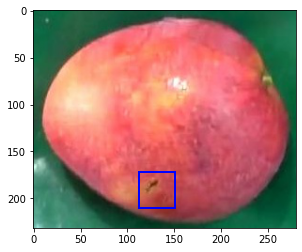

In [10]:
#LABEL_TXT = './labels/train/'
LABEL_TXT = './labels/valid/'
#IMAGE = './images/train/'
IMAGE = './images/valid/'
filename = random.choice([x for x in os.listdir(IMAGE) if os.path.isfile(os.path.join(IMAGE, x))])
#filename = '13140.jpg'
with open(LABEL_TXT + os.path.splitext(filename)[0] + '.txt', 'r') as l:
    print(LABEL_TXT + os.path.splitext(filename)[0] + '.txt')
    for label in l:
        l_x, l_y, l_w, l_h = label.split()[1:5]
        l_x = float(l_x)
        l_y = float(l_y)
        l_w = float(l_w)
        l_h = float(l_h)
        img = plt.imread(IMAGE + filename)
        h_img, w_img, _ = img.shape
        w = int(w_img * l_w)
        h = int(h_img * l_h)
        x = int(w_img * (l_x - l_w / 2))
        y = int(h_img * (l_y - l_h / 2))
        print(label, x, y, w, h)
        plt.imshow(img)
        plt.gca().add_patch(patches.Rectangle((x,y),w,h,linewidth=2,edgecolor='b',facecolor='none'))
    
plt.show()

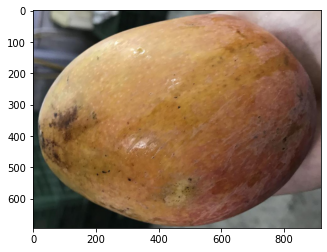

In [33]:
PATH = '../../../mango_crop/images/train'
filename = random.choice([x for x in os.listdir(PATH) if os.path.isfile(os.path.join(PATH, x))])
plt.imshow(plt.imread(PATH + '/' + filename))
plt.show()

In [16]:
df_test = pd.read_csv('Test_UploadSheet.csv')
df_test.loc[:, 'D1'] = 0
df_test.loc[:, 'D2'] = 0
df_test.loc[:, 'D3'] = 0
df_test.loc[:, 'D4'] = 0
df_test.loc[:, 'D5'] = 0
df_test.head()

,image_id,D1,D2,D3,D4,D5
0,39983.jpg,0,0,0,0,0
1,12525.jpg,0,0,0,0,0
2,22134.jpg,0,0,0,0,0
3,07679.jpg,0,0,0,0,0
4,25561.jpg,0,0,0,0,0


In [17]:
for row in range(len(df_test)):
    try:
        with open('./exp8/labels/' + os.path.splitext(df_test.loc[row, 'image_id'])[0] + '.txt', 'r') as f:
            lines = f.readlines()
            for line in lines:
                label = line.split()[0]
                if label is '0':
                    df_test.loc[row, 'D1'] = 1
                elif label is '1':
                    df_test.loc[row, 'D2'] = 1
                elif label is '2':
                    df_test.loc[row, 'D3'] = 1
                elif label is '3':
                    df_test.loc[row, 'D4'] = 1
                elif label is '4':
                    df_test.loc[row, 'D5'] = 1
    except FileNotFoundError:
        print(os.path.splitext(df_test.loc[row, 'image_id'])[0] + '.txt' + ' NotFound')

07679.txt NotFound
39529.txt NotFound
05305.txt NotFound
49420.txt NotFound
30800.txt NotFound
43428.txt NotFound
20954.txt NotFound
02928.txt NotFound
08839.txt NotFound
08750.txt NotFound
37859.txt NotFound
42771.txt NotFound
33966.txt NotFound
30065.txt NotFound
41499.txt NotFound
40963.txt NotFound
21083.txt NotFound
31060.txt NotFound
44740.txt NotFound
12731.txt NotFound
30155.txt NotFound
26771.txt NotFound
36798.txt NotFound
21775.txt NotFound
27785.txt NotFound
11276.txt NotFound
36534.txt NotFound
01451.txt NotFound
36926.txt NotFound


In [18]:
df_test.head(20)

,image_id,D1,D2,D3,D4,D5
0,39983.jpg,0,0,1,1,0
1,12525.jpg,0,0,0,1,0
2,22134.jpg,0,0,0,1,0
3,07679.jpg,0,0,0,0,0
4,25561.jpg,1,0,0,1,0
5,42859.jpg,1,0,0,0,0
6,39969.jpg,1,0,0,0,0
7,35211.jpg,1,0,0,0,0
8,30897.jpg,0,0,1,0,1
9,23747.jpg,1,0,1,1,0


In [19]:
df_test.to_csv('./upload.csv', index=False)